In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install sklearn_genetic

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sklearn_genetic in c:\users\axleng\appdata\local\programs\python\python310\lib\site-packages (0.5.1)




[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd

In [8]:
from sklearn.impute import KNNImputer

In [9]:
from sklearn.decomposition import PCA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [11]:
df=pd.read_csv(r'C:\Users\Axleng\Desktop\SPH6004\Assignment_1_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


In [12]:
df.describe()

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,...,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,...,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,...,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,...,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,...,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,...,1.000000,1.000000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,78.729524,80.000000,115.000000,95.250000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,...,2.200000,2.000000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,102.865603,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,...,21.200000,21.200000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [14]:
df['gender'].replace('M',1,inplace=True)
df['gender'].replace('F',0,inplace=True)
df['outcome'].astype(int)
df['age'].apply(int)

0        54
1        86
2        40
3        73
4        70
         ..
36484    84
36485    30
36486    60
36487    78
36488    32
Name: age, Length: 36489, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  int64  
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [16]:
df['gender'].count()

36489

In [17]:
df['outcome'].value_counts()

False    35160
True      1329
Name: outcome, dtype: int64

In [18]:
df.dropna(axis=1,thresh=20000,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  int64  
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [19]:
df_label=df['outcome'].astype(int)
df_features=df.drop(["outcome"],axis=1)
df_label

0        0
1        0
2        0
3        0
4        0
        ..
36484    0
36485    0
36486    0
36487    0
36488    0
Name: outcome, Length: 36489, dtype: int32

In [20]:
imputer=KNNImputer(n_neighbors=2)
df_filled=imputer.fit_transform(df_features)
df_filled.shape

(36489, 33)

In [21]:
sc = StandardScaler()
sc.fit(df_filled)
df_features= sc.transform(df_filled)

Oversampling-randomoversampling

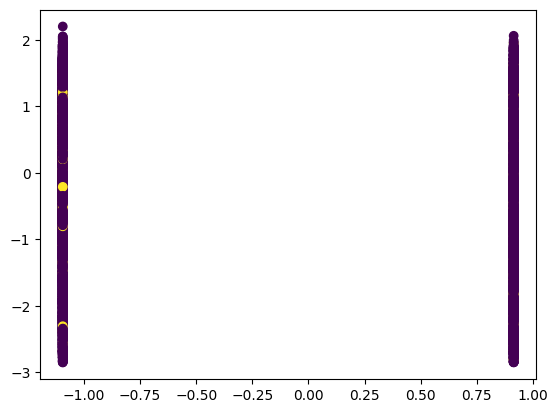

In [22]:
plt.scatter(df_features[:,0],df_features[:,1],c=df_label)

In [23]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=10)
df_features_resampled,label_resampled= ros.fit_resample(df_features,df_label)

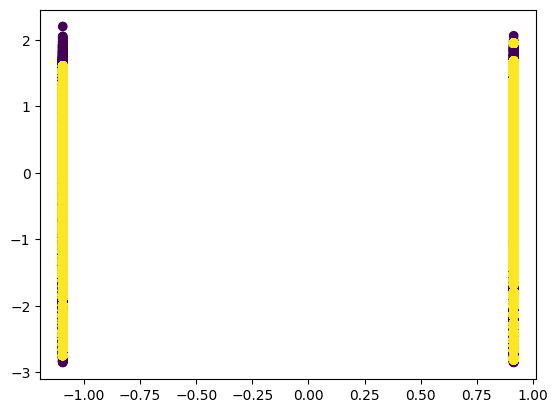

In [24]:
plt.scatter(df_features_resampled[:,0],df_features_resampled[:,1],c=label_resampled)

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=10)
df_features_resampled_sm,label_resampled_sm = sm.fit_resample(df_features,df_label)

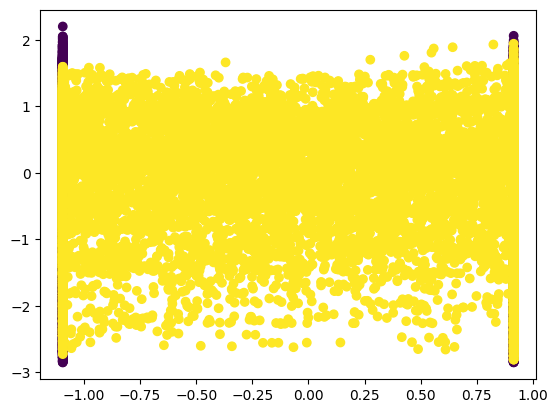

In [26]:
plt.scatter(df_features_resampled_sm[:,0],df_features_resampled_sm[:,1],c=label_resampled_sm)

selection

In [27]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(df_features_resampled,label_resampled, test_size=0.3, random_state=10)
estimator = linear_model.LogisticRegression(C=1,random_state=10)
random_estimator=estimator.fit(X_resampled_train,y_resampled_train)
random_estimator.score(X_resampled_test, y_resampled_test)

0.7093761850587789

In [28]:
X_resampled_sm_train, X_resampled_sm_test, y_resampled_sm_train, y_resampled_sm_test = train_test_split(df_features_resampled_sm,label_resampled_sm, test_size=0.3, random_state=10)
estimator = linear_model.LogisticRegression(C=1.0,random_state=10)
sm_estimator=estimator.fit(X_resampled_sm_train,y_resampled_sm_train)
sm_estimator.score(X_resampled_sm_test, y_resampled_sm_test)

0.7133579825559347

In [29]:
df_features_resampled,label_resampled=df_features_resampled_sm,label_resampled_sm 
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test=X_resampled_sm_train, X_resampled_sm_test, y_resampled_sm_train, y_resampled_sm_test

feature selection

In [30]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.model_selection import learning_curve

In [31]:
model_pca=PCA(n_components=10)
df_features_pca=model_pca.fit(df_features_resampled).transform(df_features_resampled)
df_features_pca.shape
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(df_features_pca,label_resampled, random_state=10)
pca_estimator=estimator.fit(X_pca_train, y_pca_train)
pca_estimator.score(X_pca_test, y_pca_test)

0.7046075085324232

campare

In [32]:
from sklearn.feature_selection import SelectKBest
X_skb = SelectKBest(k=10).fit_transform(df_features_resampled,label_resampled)
X_skb_train, X_skb_test, y_skb_train, y_skb_test = train_test_split(X_skb, label_resampled, random_state=10)
skb_estimator=estimator.fit(X_skb_train, y_skb_train)
skb_estimator.score(X_skb_test, y_skb_test)

0.7075085324232082

In [33]:
from sklearn.feature_selection import RFE
X_rfe = RFE(RandomForestClassifier(), n_features_to_select=10).fit_transform(df_features_resampled,label_resampled)
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe,label_resampled, random_state=10)
rfe_estimator=estimator.fit(X_rfe_train, y_rfe_train)
rfe_estimator.score(X_rfe_test, y_rfe_test)

0.7055745164960182

In [34]:
from sklearn.feature_selection import SelectFromModel
X_sfm = SelectFromModel(RandomForestClassifier(), threshold=-1, max_features=10).fit_transform(df_features_resampled,label_resampled)
X_sfm_train, X_sfm_test, y_sfm_train, y_sfm_test = train_test_split(X_sfm,label_resampled, random_state=10)
skb_estimator=estimator.fit(X_sfm_train, y_sfm_train)
skb_estimator.score(X_sfm_test, y_sfm_test)

0.7014789533560865

In [35]:
from genetic_selection import GeneticSelectionCV
model_genetic = GeneticSelectionCV(estimator=estimator,scoring="accuracy",verbose=1,max_features=10,crossover_proba=0.5,mutation_proba=0.2,n_generations=5,n_population=500,n_jobs=-1,cv=5)
genetic_estimator=model_genetic.fit(X_resampled_train, y_resampled_train)
genetic_estimator.score(X_resampled_test, y_resampled_test)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	500   	[ 0.572447  5.56      0.004339]	[ 0.058762  2.840845  0.001405]	[ 0.489903  1.        0.000773]	[  0.718653  10.         0.008267]
1  	326   	[-699.426909    7.212     700.004253]	[ 2551.627394     2.432911  2551.468997]	[-10000.            1.            0.001053]	[     0.718653     14.        10000.      ]
2  	302   	[-299.349743    7.194     300.004584]	[ 1705.986568     2.060185  1705.871405]	[-10000.            2.            0.001278]	[     0.718653     12.        10000.      ]
3  	283   	[-319.314561    6.58      320.004633]	[ 1760.124626     2.257344  1759.999158]	[-10000.           2.           0.00231]   	[     0.718653     12.        10000.      ]
4  	304   	[-99.293516   5.878    100.004722]   	[ 995.058442    2.189775  994.986963]   	[-10000.            1.            0.001948]	[    

C:\Users\Axleng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  warnings.warn(


0.7177664012135002

In [36]:
genetic_estimator.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False])

In [37]:
from genetic_selection import GeneticSelectionCV
model_genetic_1 = GeneticSelectionCV(estimator=estimator,scoring="accuracy",verbose=1,max_features=10,crossover_proba=0.5,mutation_proba=0.2,n_generations=40,n_population=500,n_jobs=-1,cv=5)
genetic_estimator_1=model_genetic_1.fit(X_resampled_train, y_resampled_train)
genetic_estimator_1.score(X_resampled_test, y_resampled_test)

Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                               
0  	500   	[ 0.572222  5.562     0.004149]	[ 0.059255  2.856249  0.001403]	[ 0.475337  1.        0.000845]	[  0.717414  10.         0.008738]
1  	279   	[-539.419484    7.06      540.004134]	[ 2260.315682     2.583873  2260.175997]	[-10000.            1.            0.000604]	[     0.717678     14.        10000.      ]
2  	298   	[-419.361158    6.628     420.004403]	[ 2006.025087     2.717649  2005.890401]	[-10000.            1.            0.001035]	[     0.718491     13.        10000.      ]
3  	281   	[-119.30253     5.448     120.004592]	[ 1088.929474     2.533633  1088.852101]	[-10000.            1.            0.001759]	[     0.718491     14.        10000.      ]
4  	300   	[-39.289454   4.556     40.004673]   	[ 631.234383    2.04716   631.189057]   	[-10000.            1.            0.001995]	[    

C:\Users\Axleng\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  warnings.warn(


0.7135949943117179

In [38]:
genetic_estimator_1.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False])

In [39]:
features_seleted,label_seleted=df_features_resampled[:,[21,27,28,30,31]],label_resampled

In [40]:
features_seleted.shape

(70320, 5)

### Train start

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [42]:
features_train, features_test, label_train, label_test = train_test_split(features_seleted,label_seleted, test_size=0.3, random_state=10)

In [43]:
logreg = linear_model.LogisticRegression(C=1)
logreg_prepro=logreg.fit(features_train, label_train)
logreg_prepro.score(features_test, label_test)

0.7164391353811149

In [44]:
logreg_pre_test=logreg_prepro.predict(features_test)
logreg_prepro_f1=f1_score(label_test, logreg_pre_test)
logreg_prepro_f1

0.6869701726844584

Text(0.5, 0, 'Predicted label')

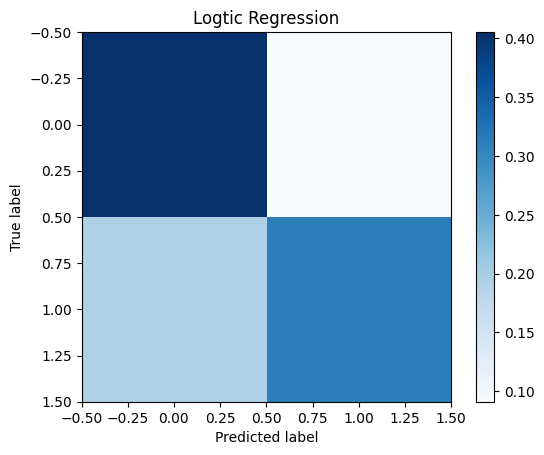

In [45]:
logreg_pre_confusion = confusion_matrix(label_test, logreg_pre_test,normalize="all")
plt.imshow(logreg_pre_confusion,cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Logtic Regression")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [46]:
clf = DecisionTreeClassifier(random_state=10)
clf = clf.fit(features_train,label_train)
clf.score(features_test,label_test)

0.9441600303375047

In [47]:
clf_pre_test=clf.predict(features_test)
clf_f1=f1_score(label_test, clf_pre_test)
clf_f1

0.9443341839145638

Text(0.5, 0, 'Predicted label')

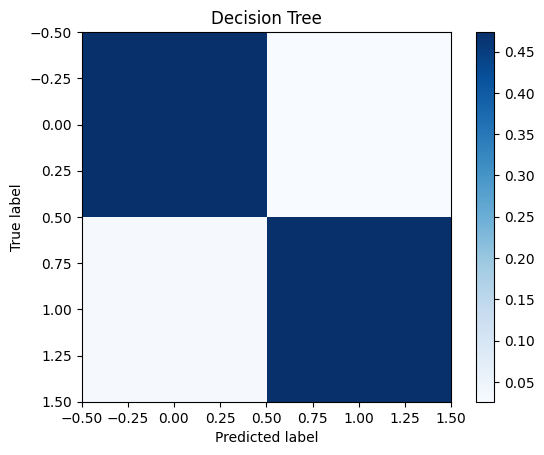

In [48]:
clf_pre_confusion = confusion_matrix(label_test, clf_pre_test,normalize="all")
plt.imshow(clf_pre_confusion,cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Decision Tree")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [49]:
rfc = RandomForestClassifier(random_state=10)
rfc = rfc.fit(features_train,label_train)
rfc.score(features_test,label_test)

0.9531190747061055

In [50]:
rfc_pre_test=rfc.predict(features_test)
rfc_f1=f1_score(label_test, rfc_pre_test)
rfc_f1

0.9528531248510272

Text(0.5, 0, 'Predicted label')

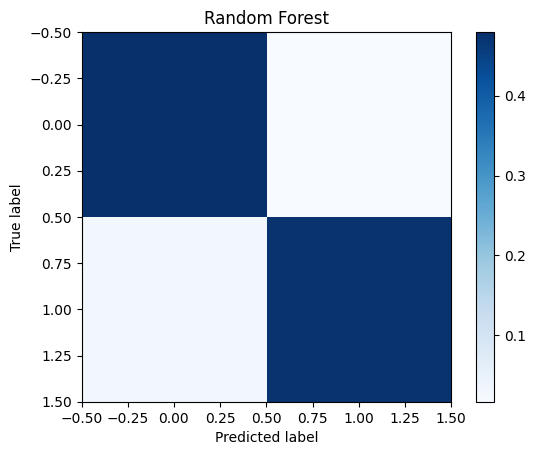

In [51]:
rfc_pre_confusion = confusion_matrix(label_test, rfc_pre_test,normalize="all")
plt.imshow(rfc_pre_confusion,cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Random Forest")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
Svm=svm.SVC(C=5,)
test_svm=Svm.fit(features_train, label_train)
test_svm.score(features_test,label_test)

0.7521331058020477

In [53]:
test_svm_pre_test=test_svm.predict(features_test)
test_svm_f1=f1_score(label_test,test_svm_pre_test)
test_svm_f1

0.7530111945585942

Text(0.5, 0, 'Predicted label')

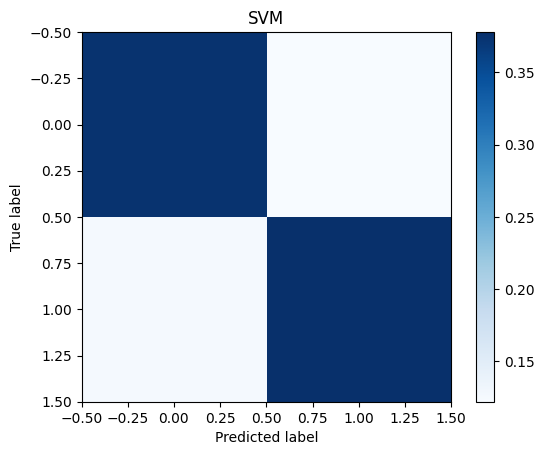

In [54]:
test_svm_pre_confusion = confusion_matrix(label_test, test_svm_pre_test,normalize="all")
plt.imshow(test_svm_pre_confusion,cmap=plt.cm.Blues)
plt.colorbar()
plt.title("SVM")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [55]:
from xgboost import XGBClassifier
Xgboost=XGBClassifier(max_depth=3,n_jobs=1,random_state=10)
test_xgboost=Xgboost.fit(features_train, label_train)
test_xgboost.score(features_test,label_test)

0.960608646188851

In [56]:
test_xgboost_pre_test=test_xgboost.predict(features_test)
test_xgboost_f1=f1_score(label_test,test_xgboost_pre_test)
test_xgboost_f1

0.9595009503387104

Text(0.5, 0, 'Predicted label')

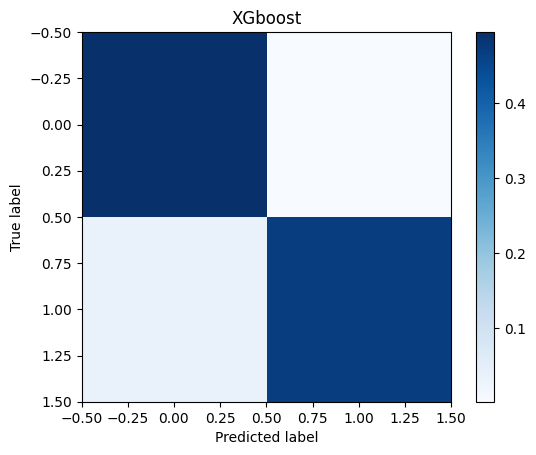

In [57]:
test_xgboost_pre_confusion = confusion_matrix(label_test, test_xgboost_pre_test,normalize="all")
plt.imshow(test_xgboost_pre_confusion,cmap=plt.cm.Blues)
plt.colorbar()
plt.title("XGboost")
plt.ylabel('True label')
plt.xlabel('Predicted label')